In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 8.2 MB/s eta 0:00:00


In [2]:
!pip install pandas

In [3]:
!pip install nltk

In [4]:
import praw
import pandas as pd
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Label the scrapped data

In [5]:
reddit = praw.Reddit(
    client_id='K-xgw36B0LIxdWeJwSUW6A',
    client_secret='ZQfnsISA4cc6dBOWfgUxCsAP3uFACg',
    user_agent='ClickbaitAnalysis'
)

In [6]:
# Use lowercase strings, PRAW handles the rest
subreddits = ['news', 'worldnews', 'politics', 'SavedYouAClick', 'fakeheadline', 'facepalm', 'Clickbait']


In [7]:
def is_valid_subreddit(name):
    try:
        subreddit = reddit.subreddit(name)
        subreddit.id  # Tries to access ID to confirm existence
        return True
    except:
        return False

print([sub for sub in subreddits if not is_valid_subreddit(sub)])


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

['fakeheadline']


In [8]:
def collect_multiple_subreddits(subreddits, posts_per_subreddit=500):
    all_posts = []

    for sub in subreddits:
        try:
            subreddit = reddit.subreddit(sub)
            for post in subreddit.hot(limit=posts_per_subreddit):
                if not post.stickied and len(post.title) > 10:
                    all_posts.append({
                        'title': post.title,
                        'score': post.score,
                        'comments': post.num_comments,
                        'url': post.url,
                        'subreddit': sub
                    })
        except Exception as e:
            print(f"Skipping subreddit '{sub}': {e}")

    return pd.DataFrame(all_posts)


In [9]:
df = collect_multiple_subreddits(subreddits, posts_per_subreddit=500)
print(f"Total posts collected: {df.shape[0]}")
df.head()  # Preview first few rows


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Skipping subreddit 'fakeheadline': Redirect to /subreddits/search


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Total posts collected: 2632


,title,score,comments,url,subreddit
0,DHS Mistakenly tells attorney US Citizen to le...,9709,483,https://www.nbcboston.com/news/local/massachus...,news
1,At least 32 people killed in Russian ballistic...,1758,39,https://www.bbc.com/news/articles/c4g4262x4x1o,news
2,Helicopter in fatal New York crash lacked flig...,1318,103,https://www.theguardian.com/us-news/2025/apr/1...,news
3,Police: Someone set fire to Pennsylvania gover...,964,83,https://apnews.com/article/josh-shapiro-arson-...,news
4,Fan controversially rips ball from Mike Trout’...,818,134,https://www.cnn.com/2025/04/13/sport/fan-snatc...,news


In [10]:
# Group by subreddit and count number of posts
subreddit_counts = df['subreddit'].value_counts()

# Print it nicely
print("Posts per subreddit:\n")
print(subreddit_counts)


Posts per subreddit:

subreddit
SavedYouAClick    500
politics          500
worldnews         499
facepalm          477
Clickbait         461
news              195
Name: count, dtype: int64


In [11]:
df.to_csv('reddit_news.csv', index=False) # Added this line to save to CSV


In [13]:
import re

def improved_clickbait_label(row):
    title = row['title']
    subreddit = row['subreddit'].lower()

    heuristics = {
        'emotional': [
        r"\b(shocking|unbelievable|heartbreaking|terrifying|amazing|incredible|jaw[-\s]?dropping|devastating|horrifying|surprising)\b"
    ],
    'curiosity_gap': [
        r"\b(you won’t believe|what happened next|this is why|you need to see|guess what|before you know it|watch what happens|you’ll never guess|goes viral|find out why)\b",
        r"\b(you gotta|who knew|what if|this guy|this one|when you|that moment|can we talk about|what’s going on with|this is how)\b"
    ],
    'listicles': [
        r"\b(top \d+|best \d+|must[-\s]?see|don’t miss|things you didn’t know)\b",
        r"\b\d+\b\s+(things|ways|reasons|facts|hacks)\b"
    ],
    'vague_hype': [
        r"\b(the truth about|what no one tells you|will surprise you|what they don’t want you to know|blow your mind|it turns out|here’s what|this is what happens when|this is how)\b"
    ],
    'questions': [
        r"(?<!\w)(how|what|why|when|who|can|should|could|would|is|are)\b.*\?",
        r"\b(is this the end|could this be|should you|are we|is it true)\b"
    ],
    'extreme_adjectives': [
        r"\b(extremely|absolutely|literally|completely|entirely|insanely|massive|huge|deadly|epic)\b"
    ],
    'formatting': [
        r"[!?]{2,}",           # Multiple ! or ?
        r"[A-Z\s]{10,}",       # Long all-uppercase phrases
        r"\.\.\."              # Ellipsis
    ]
    }

    score = 0
    for category, patterns in heuristics.items():
        for pattern in patterns:
            if re.search(pattern, title, re.IGNORECASE):
                score += 1
                break  # One match per category

    if score >= 2 or subreddit in ['clickbait', 'savedyouaclick']:
        return 1
    else:
        return 0

# Apply to your DataFrame
df['label'] = df.apply(improved_clickbait_label, axis=1)

# Show distribution
print(df['label'].value_counts())


label
0    1568
1    1064
Name: count, dtype: int64


Preprocess

In [14]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Basic text preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)         # remove non-alphabet characters
    text = re.sub(r"\s+", " ", text).strip()     # normalize whitespace
    return text

# Apply to training and test data
df['clean_title'] = df['title'].apply(preprocess)

In [16]:
from sklearn.model_selection import train_test_split
# Split the data into 20% test set
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
# Save raw scraped data
test_data.to_csv("test_reddit_news_posts.csv", index=False)
train_data.to_csv("train_reddit_news_posts.csv", index=False)
print("Test and Train Data saved to reddit_news_posts_raw.csv with labels")


Test and Train Data saved to reddit_news_posts_raw.csv with labels


In [19]:
train_data.head()

,title,score,comments,url,subreddit,label,clean_title
1186,Trump Said He Lowered Egg Prices—They Just Hit...,5606,226,https://www.thedailybeast.com/egg-prices-soar-...,politics,0,trump said he lowered egg pricesthey just hit ...
2534,(satire) oh hey there bright side! did you hav...,1,0,https://i.redd.it/k4gaao5jb8i21.jpg,Clickbait,1,satire oh hey there bright side did you have f...
564,EU seeks China’s help to contain Trump’s trade...,1904,121,https://www.politico.eu/article/eu-pencils-in-...,worldnews,0,eu seeks chinas help to contain trumps trade war
482,More than 150 Chinese citizens fighting for Ru...,100,13,https://www.politico.eu/article/ukraine-fight-...,worldnews,0,more than chinese citizens fighting for russia...
1842,I am 100% Trump!,4214,642,https://i.redd.it/3kllyzzs01ue1.jpeg,facepalm,0,i am trump


In [20]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer # Make sure to import here


In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['clean_title'])
X_test = vectorizer.transform(test_data['clean_title'])
y_train = train_data['label']


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Model 1: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Model 2: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [25]:
test_data['label_lr'] = lr_model.predict(X_test)

In [32]:
test_data[['title','subreddit','label','label_lr']].to_csv("test_predictions.csv", index=False)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
y_true = test_data['label']

# Logistic Regression
print("🔹 Logistic Regression")
print(classification_report(y_true, test_data['label_lr'], target_names=["Non-Clickbait", "Clickbait"]))

🔹 Logistic Regression
               precision    recall  f1-score   support

Non-Clickbait       0.81      0.87      0.84       316
    Clickbait       0.78      0.69      0.73       211

     accuracy                           0.80       527
    macro avg       0.79      0.78      0.78       527
 weighted avg       0.80      0.80      0.79       527



In [29]:
test_data['label_nb'] = nb_model.predict(X_test)

In [33]:
test_data[['title','subreddit','label','label_nb']].to_csv("test_predictions_nb.csv", index=False)

In [30]:
y_true = test_data['label']

# Logistic Regression
print("Naive Bayes")
print(classification_report(y_true, test_data['label_nb'], target_names=["Non-Clickbait", "Clickbait"]))

Naive Bayes
               precision    recall  f1-score   support

Non-Clickbait       0.82      0.86      0.84       316
    Clickbait       0.78      0.73      0.75       211

     accuracy                           0.81       527
    macro avg       0.80      0.79      0.80       527
 weighted avg       0.81      0.81      0.81       527



Use Hugging Face Transformers

In [4]:
!pip install transformers


In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [2]:
import pandas as pd


In [3]:
train_data=pd.read_csv("train_reddit_news_posts.csv")
test_data=pd.read_csv("test_reddit_news_posts.csv")

In [6]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

In [7]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
# Convert everything to string (important!)
train_data['clean_title'] = train_data['clean_title'].astype(str)

In [9]:
# Tokenize text
train_dataset = Dataset.from_pandas(train_data[['clean_title', 'label']])
# Tokenize using correct access to batched text data
train_dataset = train_dataset.map(lambda x: tokenizer(x['clean_title'], truncation=True, padding='max_length'), batched=True)
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])




Map:   0%|          | 0/2105 [00:00<?, ? examples/s]

In [10]:
# Load model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
# Define training args
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=16,
    num_train_epochs=3,
    evaluation_strategy="no",
    logging_strategy="epoch",          # Logs every epoch
    save_strategy="epoch",             # Saves model every epoch
    logging_dir='./logs',
    report_to="wandb"

)

# Train
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset)
trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nandinireddykanchi (nandinireddykanchi-indiana-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
132,0.383500
264,0.161800
396,0.061700


TrainOutput(global_step=396, training_loss=0.20229989832097833, metrics={'train_runtime': 731.0811, 'train_samples_per_second': 8.638, 'train_steps_per_second': 0.542, 'total_flos': 1661546314598400.0, 'train_loss': 0.20229989832097833, 'epoch': 3.0})

Bert Test Predictions

In [15]:
from datasets import Dataset

# Remove missing/empty titles just in case
test_data = test_data.dropna(subset=['clean_title'])
test_data['clean_title'] = test_data['clean_title'].astype(str)

# Convert to Hugging Face Dataset
test_dataset = Dataset.from_pandas(test_data[['clean_title']])

# Tokenize test data
def tokenize_function(examples):
    return tokenizer(examples['clean_title'], truncation=True, padding='max_length')

test_dataset = test_dataset.map(tokenize_function, batched=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])


Map:   0%|          | 0/527 [00:00<?, ? examples/s]

In [16]:
from torch.utils.data import DataLoader
from transformers import Trainer

# Use Trainer for predictions
trainer = Trainer(model=model)

# Get predictions
predictions = trainer.predict(test_dataset)
logits = predictions.predictions

# Convert logits to label (0 or 1)
import numpy as np
test_preds = np.argmax(logits, axis=1)

# Add predictions to test data
test_data['title','label','bert_predicted_label'] = test_preds

In [17]:
test_data.to_csv("bert_test_predictions.csv", index=False)

In [19]:
from sklearn.metrics import classification_report

# Predict on training data
test_predictions = trainer.predict(test_dataset)
test_preds = np.argmax(test_predictions.predictions, axis=1)

# Evaluation report
print(classification_report(test_data['label'], test_preds, target_names=['Non-Clickbait', 'Clickbait']))


               precision    recall  f1-score   support

Non-Clickbait       0.90      0.92      0.91       316
    Clickbait       0.87      0.85      0.86       211

     accuracy                           0.89       527
    macro avg       0.89      0.89      0.89       527
 weighted avg       0.89      0.89      0.89       527



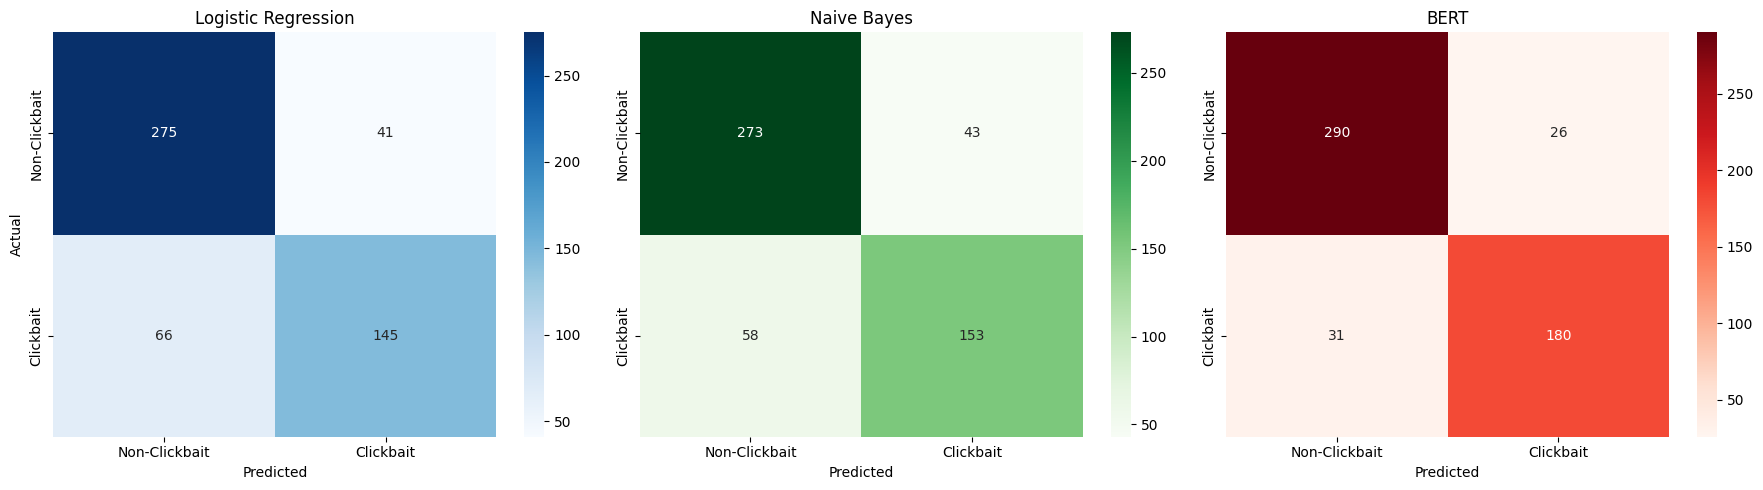

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Recompute confusion matrices (if not already)
lr_cm = confusion_matrix(true_labels, lr_preds)
nb_cm = confusion_matrix(true_labels, nb_preds)
bert_cm = confusion_matrix(true_labels, bert_preds)

# Plot side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Clickbait", "Clickbait"],
            yticklabels=["Non-Clickbait", "Clickbait"], ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Non-Clickbait", "Clickbait"],
            yticklabels=["Non-Clickbait", "Clickbait"], ax=axes[1])
axes[1].set_title("Naive Bayes")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

sns.heatmap(bert_cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=["Non-Clickbait", "Clickbait"],
            yticklabels=["Non-Clickbait", "Clickbait"], ax=axes[2])
axes[2].set_title("BERT")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import classification_report

# Predictions on test data
lr_preds = lr_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
bert_preds = np.argmax(test_predictions.predictions, axis=1)

true_labels = test_data['label']  # true labels from test set

# Classification Reports
print("🔹 Logistic Regression")
print(classification_report(true_labels, lr_preds, target_names=["Non-Clickbait", "Clickbait"]))

print("🔹 Naive Bayes")
print(classification_report(true_labels, nb_preds, target_names=["Non-Clickbait", "Clickbait"]))

print("🔹 BERT")
print(classification_report(true_labels, bert_preds, target_names=["Non-Clickbait", "Clickbait"]))


🔹 Logistic Regression
               precision    recall  f1-score   support

Non-Clickbait       0.81      0.87      0.84       316
    Clickbait       0.78      0.69      0.73       211

     accuracy                           0.80       527
    macro avg       0.79      0.78      0.78       527
 weighted avg       0.80      0.80      0.79       527

🔹 Naive Bayes
               precision    recall  f1-score   support

Non-Clickbait       0.82      0.86      0.84       316
    Clickbait       0.78      0.73      0.75       211

     accuracy                           0.81       527
    macro avg       0.80      0.79      0.80       527
 weighted avg       0.81      0.81      0.81       527

🔹 BERT
               precision    recall  f1-score   support

Non-Clickbait       0.90      0.92      0.91       316
    Clickbait       0.87      0.85      0.86       211

     accuracy                           0.89       527
    macro avg       0.89      0.89      0.89       527
 weighted avg 

In [43]:
# Show top predictive words
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefs = lr_model.coef_[0]
top_positive = np.argsort(coefs)[-10:]
top_negative = np.argsort(coefs)[:10]

print("Top Clickbait Words:")
print([feature_names[i] for i in top_positive])

print("Top Non-Clickbait Words:")
print([feature_names[i] for i in top_negative])


Top Clickbait Words:
['was', 'it', 'they', 'is', 'what', 'one', 'you', 'clickbait', 'this', 'the']
Top Non-Clickbait Words:
['trump', 'us', 'tariffs', 'says', 'ukraine', 'tariff', 'china', 'trumps', 'donny', 'market']


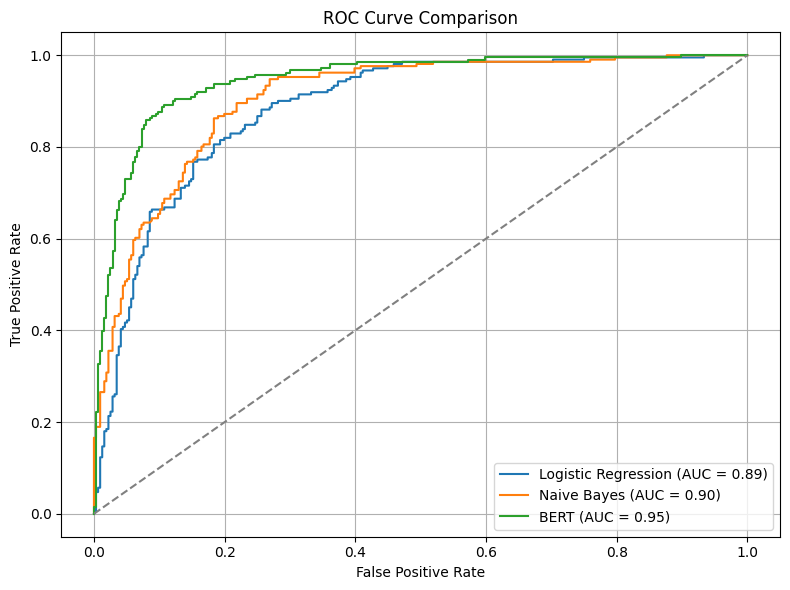

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# Example for Logistic Regression
lr_probs = lr_model.predict_proba(X_test)[:, 1]
nb_probs = nb_model.predict_proba(X_test)[:, 1]
bert_probs = test_predictions.predictions[:, 1]  # Assuming logits or softmax probs

# True labels
y_true = test_data['label']

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_true, lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_true, nb_probs)
fpr_bert, tpr_bert, _ = roc_curve(y_true, bert_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %.2f)' % roc_auc_score(y_true, lr_probs))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %.2f)' % roc_auc_score(y_true, nb_probs))
plt.plot(fpr_bert, tpr_bert, label='BERT (AUC = %.2f)' % roc_auc_score(y_true, bert_probs))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-51-9c908d61aa69>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


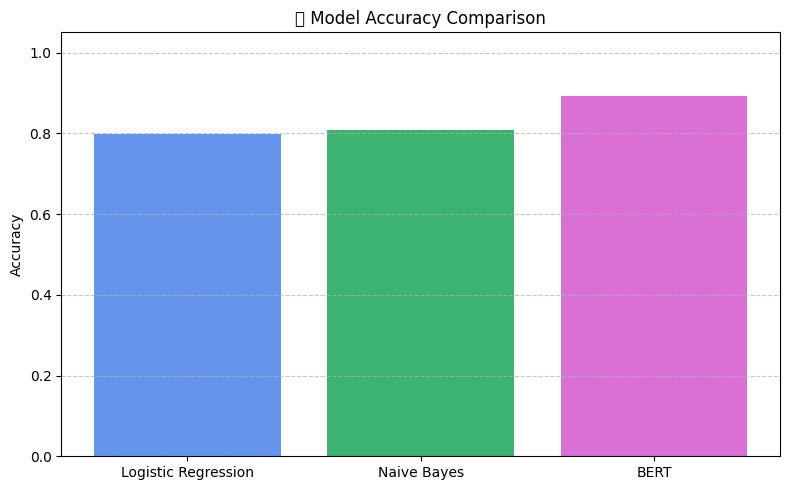

In [51]:
from sklearn.metrics import accuracy_score

accuracy = [
    accuracy_score(true_labels, lr_preds),
    accuracy_score(true_labels, nb_preds),
    accuracy_score(true_labels, bert_preds)
]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['cornflowerblue', 'mediumseagreen', 'orchid'])
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.title('📊 Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


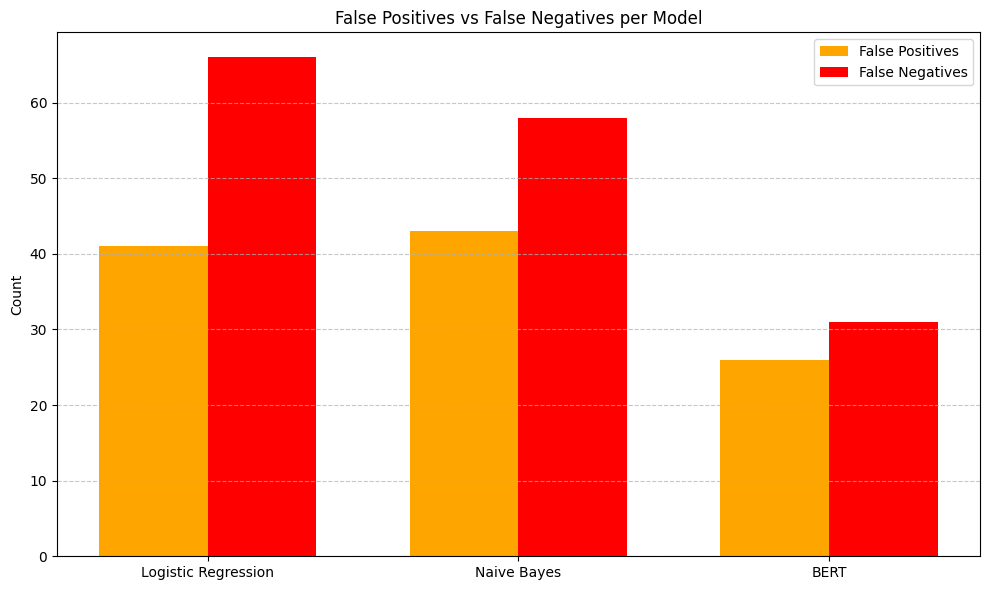

In [53]:
from sklearn.metrics import confusion_matrix

def get_fp_fn(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp, fn

lr_fp, lr_fn = get_fp_fn(confusion_matrix(true_labels, lr_preds))
nb_fp, nb_fn = get_fp_fn(confusion_matrix(true_labels, nb_preds))
bert_fp, bert_fn = get_fp_fn(confusion_matrix(true_labels, bert_preds))

fp = [lr_fp, nb_fp, bert_fp]
fn = [lr_fn, nb_fn, bert_fn]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, fp, width, label='False Positives', color='orange')
plt.bar(x + width/2, fn, width, label='False Negatives', color='red')

plt.ylabel('Count')
plt.title('False Positives vs False Negatives per Model')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
